#Wine Quality Prediction

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

Dataset

In [13]:
red=pd.read_csv("winequality-red.csv",sep=";")
white=pd.read_csv("winequality-white.csv",sep=";")

In [14]:
red.info()
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [15]:
# Take a sample of five rows of `red`
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
726,8.1,0.72,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1,6
1021,11.3,0.36,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6
119,7.0,0.69,0.08,1.8,0.097,22.0,89.0,0.99590,3.34,0.54,9.2,6
249,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6
1379,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,6


In [16]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
# Describe `red`
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
# Double check for null values in `red`&'white'
red.isnull().sum()
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Graph

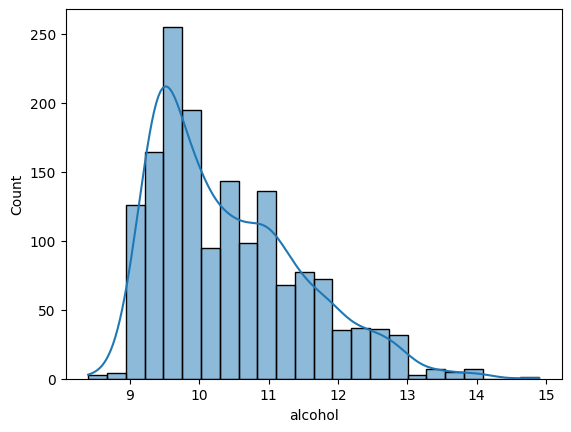

In [27]:
sns.histplot(x="alcohol",data=red,kde=True)
plt.show()

<Figure size 5000x5500 with 0 Axes>

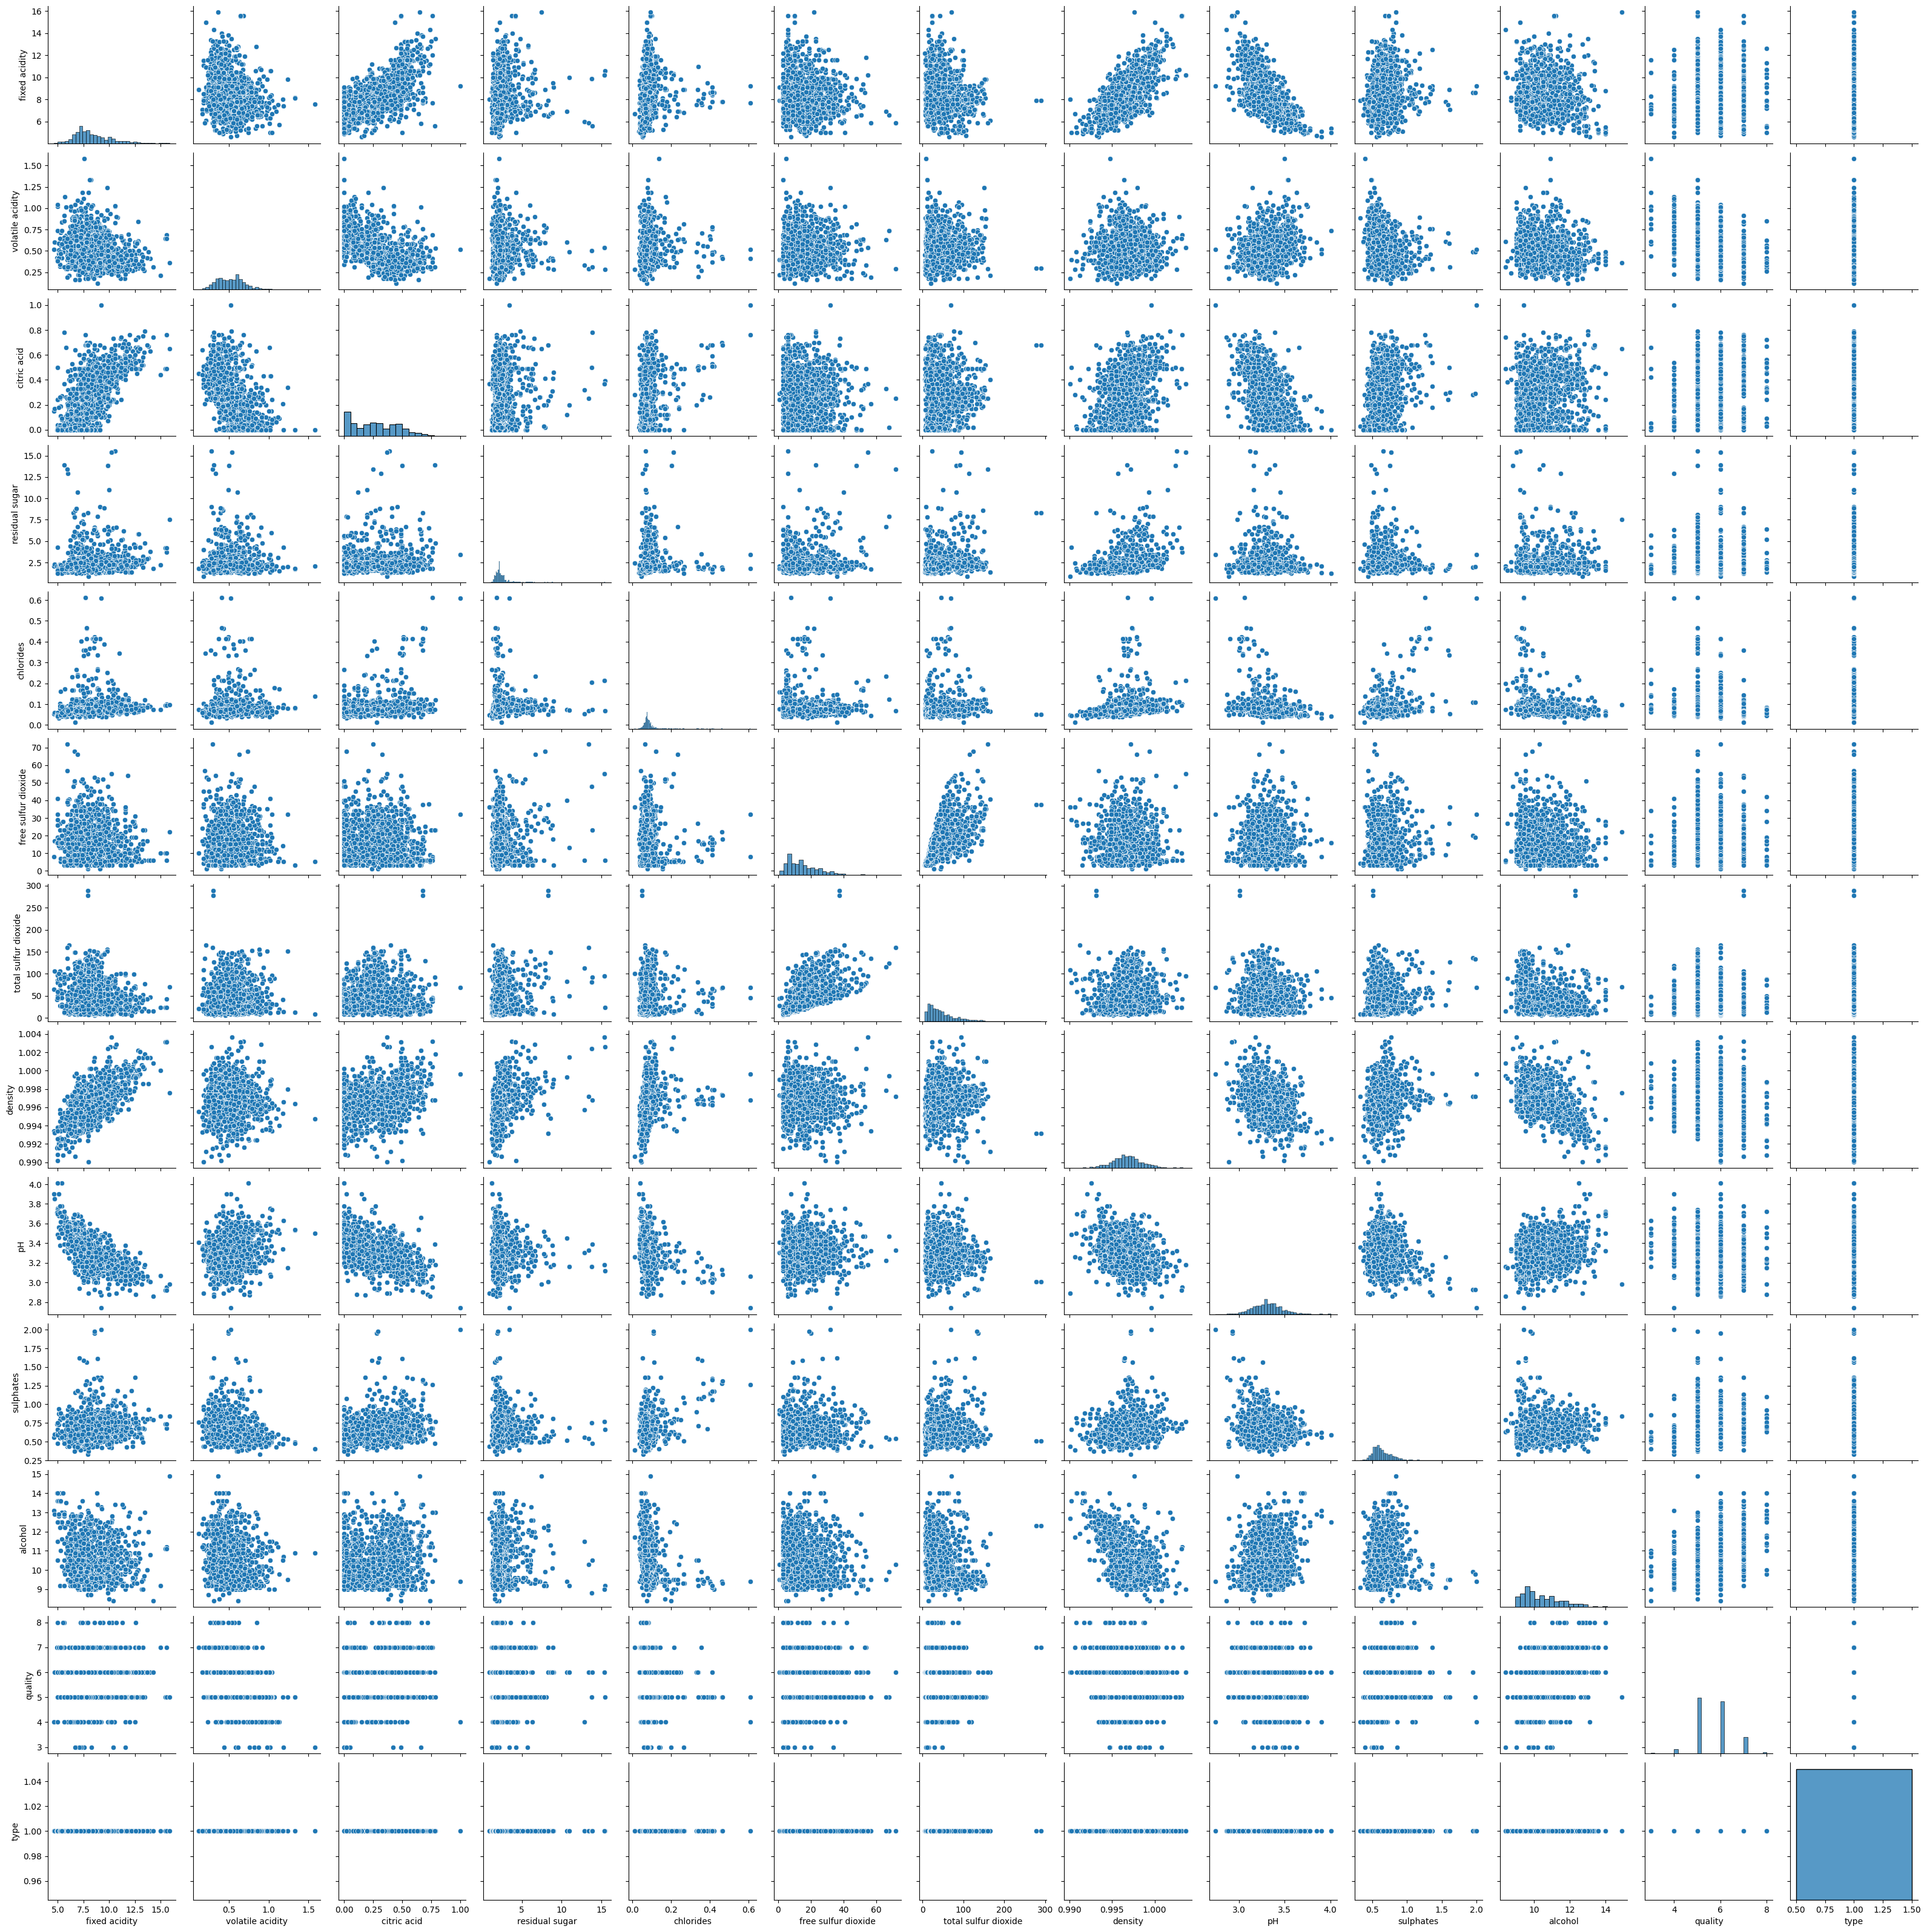

In [29]:
plt.figure(figsize=(50,55))
sns.pairplot(data=red)
plt.show()

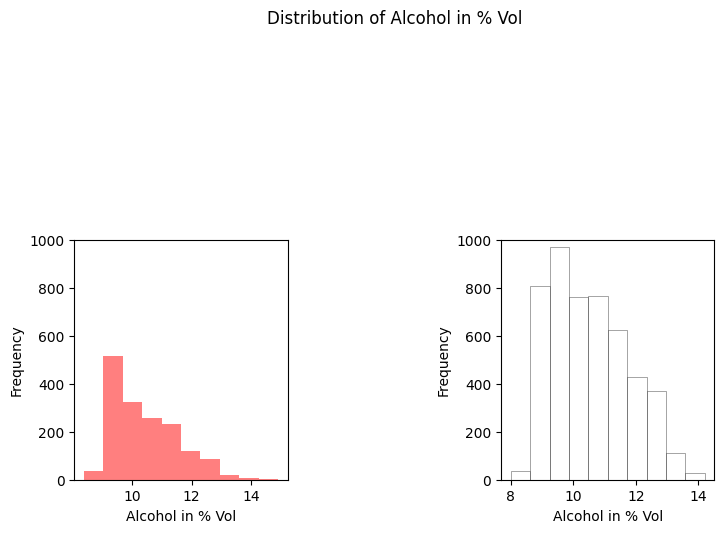

In [30]:
# Create Histogram
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
			alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
		ec ="black", lw = 0.5, alpha = 0.5,
		label ="White wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0,
			top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [20]:
# Add `type` column to `red` with price one
red["type"]=1
# Add `type` column to `white` with price zero
white["type"]=0
# conacat `white` to `red`
wine=pd.concat([red,white],ignore_index=True)
#show the wine data set
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#Training & Testing DataSet

In [21]:
# Use .iloc for position based indexing
X = wine.iloc[:, 0:11]
y = np.ravel(wine.type)

# Splitting the data set for training and validating
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.34, random_state = 45)

#Using Deep Learning for Adam

In [22]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))

# Add one hidden layer
model.add(Dense(9, activation ='relu'))

# Add an output layer
model.add(Dense(1, activation ='sigmoid'))

# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy',
optimizer ='adam', metrics =['accuracy'])

C:\Users\vrooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

# prediction

In [23]:
# Training Model
model.fit(X_train, y_train, epochs = 3,
		batch_size = 1, verbose = 1)

# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8504 - loss: 0.6373
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9390 - loss: 0.1800
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9523 - loss: 0.1441
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[0.0223777 ]
 [0.0666218 ]
 [0.00624983]
 ...
 [0.07601984]
 [0.02019196]
 [0.00205887]]
